In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
df = pd.read_csv('/Users/wangzhicheng/Desktop/data_science/kaggle_project/kaggle_supermarket_sales/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [40]:
# Check and rop na values in df
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### **Total income and gross income analysis**

In [41]:
# Which branch had the most total income in those three months?
df_total = df.groupby('Branch').sum().sort_values(by=['Total'],ascending=False)
print(df_total.iloc[0])
print(df_total.iloc[0]['Total'])


Unit price                  18567.760000
Quantity                     1831.000000
Tax 5%                       5265.176500
Total                      110568.706500
cogs                       105303.530000
gross margin percentage      1561.904762
gross income                 5265.176500
Rating                       2319.900000
Name: C, dtype: float64
110568.7065


In [42]:
# Which branch had the most gross income in those three months?
df_gross_income = df.groupby('Branch').sum().sort_values(by=['gross income'],ascending=False)
print(df_gross_income.iloc[0])
print(df_gross_income.iloc[0]['gross income'])


Unit price                  18567.760000
Quantity                     1831.000000
Tax 5%                       5265.176500
Total                      110568.706500
cogs                       105303.530000
gross margin percentage      1561.904762
gross income                 5265.176500
Rating                       2319.900000
Name: C, dtype: float64
5265.1765


### **Product line in different cities analysis**

In [43]:
# Which product line that members in Yongon city spent most on?
df_ym = df[['City','Customer type','Product line','Total']]
df_ym = df_ym.loc[(df['City']=='Yangon') & (df['Customer type']=='Member')]
df_ym = df_ym.groupby('Product line').sum().sort_values(by=['Total'],ascending=False)
df_ym

,Total
Product line,
Home and lifestyle,12556.2990
Sports and travel,9676.9575
Electronic accessories,9145.6890
Food and beverages,8877.0570
Fashion accessories,6942.5790
Health and beauty,6438.8940


In [44]:
# Which product line that normal customers in Naypyitaw city spent most on?
df_nn = df[['City','Customer type','Product line','Total']]
df_nn = df_nn.loc[(df['City']=='Naypyitaw') & (df['Customer type']=='Normal')]
df_nn = df_nn.groupby('Product line').sum().sort_values(by=['Total'],ascending=False)
df_nn

,Total
Product line,
Electronic accessories,11041.0230
Food and beverages,10709.4120
Fashion accessories,9518.2185
Health and beauty,8551.0005
Sports and travel,7624.6380
Home and lifestyle,6243.1320


### **Product line in different months analysis**

In [45]:
# Which is the most profitable product line in different months perspectively?
df_pm = df[['Product line','Date','gross income']]

def get_month(date):
    return date.split('/')[0]

df_pm['Month'] = df_pm['Date'].apply(lambda x: get_month(x))

df_pm_jan = df_pm.loc[df_pm['Month']=='1'].groupby('Product line').sum().sort_values(by=['gross income'],ascending=False).reset_index()
df_pm_feb = df_pm.loc[df_pm['Month']=='2'].groupby('Product line').sum().sort_values(by=['gross income'],ascending=False).reset_index()
df_pm_mar = df_pm.loc[df_pm['Month']=='3'].groupby('Product line').sum().sort_values(by=['gross income'],ascending=False).reset_index()

print(df_pm_jan.iloc[0].values)
print(df_pm_feb.iloc[0].values)
print(df_pm_mar.iloc[0].values)

['Sports and travel' 1031.763]
['Food and beverages' 952.398]
['Home and lifestyle' 996.7995]


/var/folders/1d/kh7qkkz51_l7kldg3_tc40rw0000gn/T/ipykernel_11950/4097396993.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm['Month'] = df_pm['Date'].apply(lambda x: get_month(x))


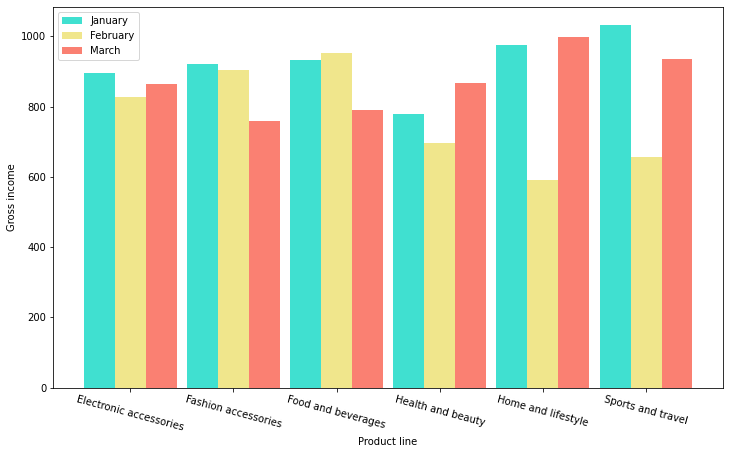

In [46]:
# Plot the result
x = np.arange(6)
y1 = df_pm.loc[df_pm['Month']=='1'].groupby('Product line').sum()['gross income'].values
y2 = df_pm.loc[df_pm['Month']=='2'].groupby('Product line').sum()['gross income'].values
y3 = df_pm.loc[df_pm['Month']=='3'].groupby('Product line').sum()['gross income'].values
width = 0.3

plt.figure(figsize=(12,7))

plt.bar(x-0.3, y1, width, color='turquoise')
plt.bar(x, y2, width, color='khaki')
plt.bar(x+0.3, y3, width, color='salmon')
plt.xticks(x, sorted(df_pm['Product line'].unique()), rotation=-15)
plt.xlabel('Product line')
plt.ylabel('Gross income')

plt.legend(['January','February','March'])
plt.show()

### **Gross income change of all product lines over the period of three months**

/var/folders/1d/kh7qkkz51_l7kldg3_tc40rw0000gn/T/ipykernel_11950/446354003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pd['Date'] = pd.to_datetime(df_pd['Date'])


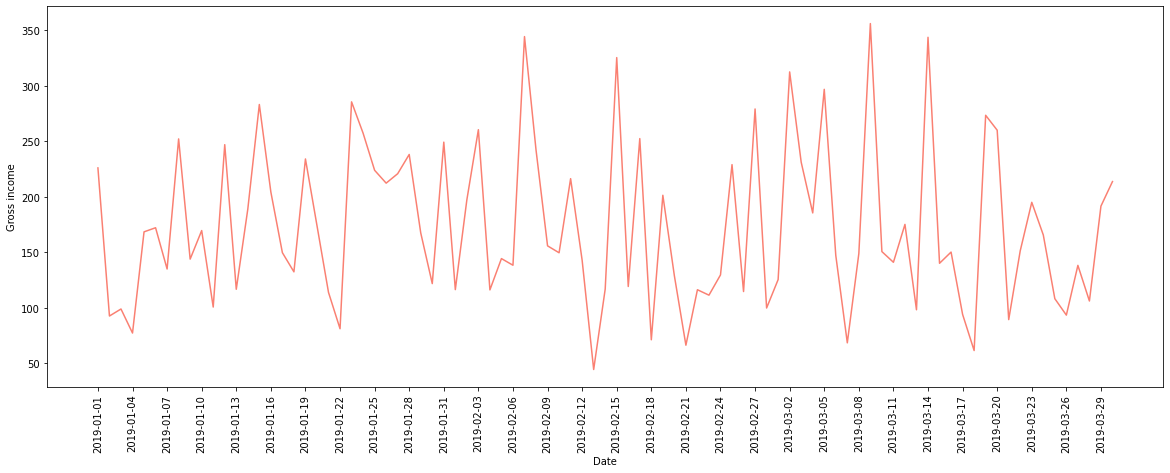

In [47]:
# First check gross income of all product lines in this period and plot it
# For easier analysis, from here we convert the 'Date' from string to datetime object

df_pd = df[['Product line','Date','gross income']]
df_pd['Date'] = pd.to_datetime(df_pd['Date'])
df_pd1 = df_pd.groupby(pd.Grouper(key='Date',axis=0,freq='D',sort=True)).sum().reset_index()

x = df_pd1['Date']
y = df_pd1['gross income']
plt.figure(figsize=(20,7))
plt.plot(x, y, label = 'Gross Income', color='salmon')
plt.xticks(x[::3], rotation=90)
plt.xlabel('Date')
plt.ylabel('Gross income')
plt.show()

In [48]:
product_line

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

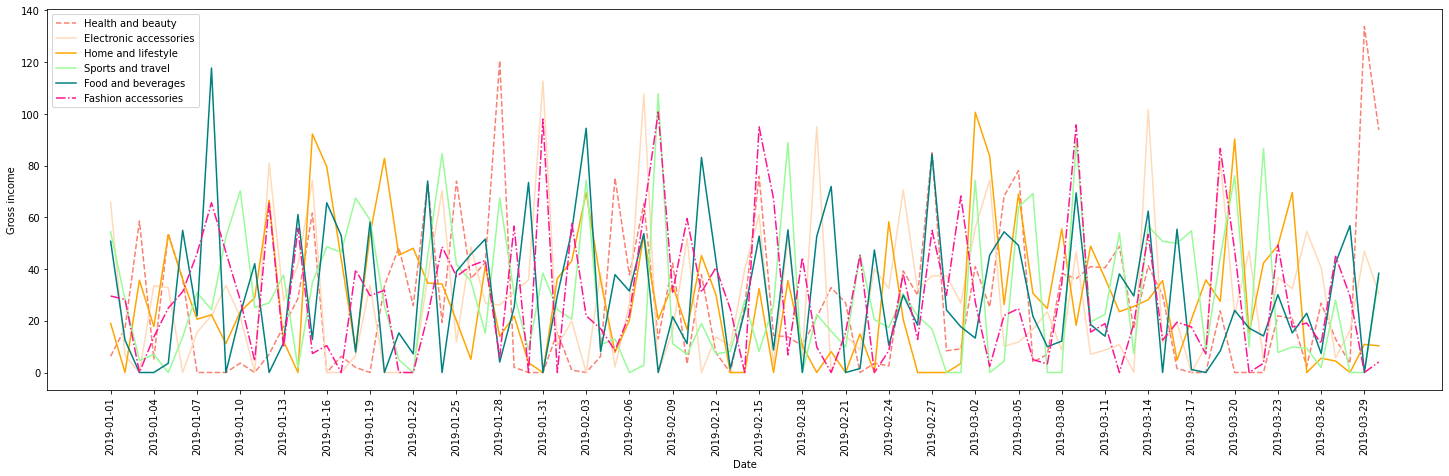

In [64]:
# Check the gross income of all product lines in this period

# Get gross income for each product line
product_line = df['Product line'].unique()
y2 = []
for i in product_line:
    z2 = df_pd.loc[df_pd['Product line']==i].groupby(pd.Grouper(key='Date',axis=0,freq='D',sort=True)).sum()['gross income'].values
    y2.append(z2)

# Plot the result

plt.figure(figsize=(25,7))
plt.plot(x,y2[0], label = 'Health and beauty', color='salmon',linestyle='dashed')
plt.plot(x,y2[1], label = 'Electronic accessories', color='peachpuff')
plt.plot(x,y2[2], label = 'Home and lifestyle', color='orange')
plt.plot(x,y2[3], label = 'Sports and travel', color='palegreen')
plt.plot(x,y2[4], label = 'Food and beverages', color='teal')
plt.plot(x,y2[5], label = 'Fashion accessories', color='deeppink',linestyle='dashdot')

plt.xticks(x[::3],rotation = 90)
plt.xlabel('Date')
plt.ylabel('Gross income')
plt.legend()
plt.show()
